# Sentiment Analysis of COVID-19 Tweets

## 1. Introduction
### Purpose of the Project: Briefly explain the aim of the project, such as analyzing sentiments from tweets related to COVID-19.
### Importance of Sentiment Analysis: Discuss why sentiment analysis is significant in understanding public opinion during crises like the pandemic.

In [72]:
display(Image(url='https://media.giphy.com/media/vOJDTW3FApxfgRXBtD/giphy.gif?cid=ecf05e47dnudbuz30tkfz43joou9cvkk7vr25mz2bnm70pcd&ep=v1_gifs_search&rid=giphy.gif&ct=g.gif'))

In [69]:
import pandas as pd
from IPython.display import Image, display, HTML

data=pd.read_csv("sampled_data.csv")

In [32]:
data.shape

(5000, 13)

## 2. Dataset Description

### Source of Data: Describe where the data was obtained (Kaggle).
### Features of the Dataset: List the columns in the dataset and provide a brief description of each, including what information they hold (text, user, location, sentiment).

In [33]:
data.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,British Landlords Association (The BLA),United Kingdom,British Landlords Association -The BLA a FREE ...,2015-07-13 10:44:04,13360,2337,12440,False,2020-07-26 06:55:54,The latest The British Landlord Association Da...,NaN,Paper.li,False
1,Mo Eco Devo,"Jefferson City, MO",Helping create opportunities for Missourians t...,2009-10-01 18:28:54,4082,531,1360,True,2020-08-18 18:02:45,#COVID19 has affected business owners and work...,"['COVID19', 'MO']",Hootsuite Inc.,False
2,KYT,"Thane, India","From the house of Thanevaibhav, Thane district...",2016-11-02 16:45:08,239,14,168,False,2020-07-25 05:09:23,July 24: #Thane city #COVID19 update\nNew case...,"['Thane', 'COVID19']",Twitter Web App,False
3,Dr. Wolfgang H Thome,Germany,"Publisher of ATCNews, Africa's largest publica...",2010-04-20 06:38:31,11759,812,45496,False,2020-07-27 03:03:04,#COVID19\nGlobal overnight developments from 2...,['COVID19'],Twitter Web App,False
4,Belinda Hayes,Melbourne,Communicating the amazing stories from @monash...,2009-08-27 07:28:18,478,720,217,False,2020-08-04 06:39:22,Theatre can respond to the gendered impacts of...,['COVID19'],Hootsuite Inc.,False
5,MOHAMMED I. JEGA,Naija,"Co-founder, Domineum.iolChief Business Develop...",2009-10-29 20:57:26,2210,1212,1811,False,2020-08-01 17:09:37,How Hospitals are Using AI to Fight COVID-19.\...,['techsaturdays'],Instagram,False
6,Propertymark,NaN,Are you Propertymark Protected? Our agents off...,2016-07-22 14:53:31,1173,696,1153,False,2020-08-11 08:45:04,We've updated our dedicated #coronavirus page ...,['coronavirus'],Hootsuite Inc.,False
7,Manish A. Shah,Between here and there...,"Father, husband, oncologist @MeyerCancer, rese...",2014-03-15 01:31:58,1761,502,5665,False,2020-08-10 15:57:19,Get Well Gilberto! To better times! \n\n#COVI...,['COVID19'],Twitter Web App,False
8,WorldStage,"Lagos, Nigeria",https://t.co/Qsywjub3Cc https://t.co/MORN7vdk5V,2011-09-12 15:57:05,20913,22957,39,False,2020-08-01 15:58:11,WorldStage Newsonline-- Gov. David Umahi of Eb...,NaN,Blog2Social APP,False
9,The Ismaili,NaN,The official Twitter account of the Ismaili Mu...,2008-10-14 03:53:34,19810,24,79,True,2020-08-11 09:30:20,Listen to @AliVelshi discuss how wearing a mas...,NaN,Falcon Social Media Management,False


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         5000 non-null   object
 1   user_location     4001 non-null   object
 2   user_description  4728 non-null   object
 3   user_created      5000 non-null   object
 4   user_followers    5000 non-null   int64 
 5   user_friends      5000 non-null   int64 
 6   user_favourites   5000 non-null   int64 
 7   user_verified     5000 non-null   bool  
 8   date              5000 non-null   object
 9   text              5000 non-null   object
 10  hashtags          3586 non-null   object
 11  source            4999 non-null   object
 12  is_retweet        5000 non-null   bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 439.6+ KB


## 3. Data Preprocessing
### Cleaning the Data -- (removing duplicates, handling missing values)

In [74]:
display(Image(url="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExejZ1Y3NyY2YybWszamZtdDNsMDc3OG5mOHUzYTkwa3NhODdjZ2wyYiZlcD12MV9naWZzX3NlYXJjaCZjdD1n/NV4cSrRYXXwfUcYnua/giphy.gif"))

In [37]:
data.isnull().sum()

user_name              0
user_location        999
user_description     272
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1414
source                 1
is_retweet             0
dtype: int64

In [38]:
data.dropna(subset=["user_location"], inplace=True)
data.dropna(subset=["user_description"], inplace=True)
data.dropna(subset=["hashtags"], inplace=True)
data.dropna(subset=["source"],inplace=True)


## Text Processing -
#### We import re for regex operations and nltk for natural language processing.

In [39]:
import re
import nltk
from nltk.corpus import stopwords # remove is , the like words 
from nltk.stem import WordNetLemmatizer # convert base form of that words like running into run


### Resource Downloads -
#### We download stopwords and the WordNet lemmatizer from NLTK.
#### Removes URLs, usernames, hashtags, and non-alphabetic characters.
#### Converts text to lowercase and lemmatizes words to their base forms.
#### Filters out common stopwords.

In [40]:
nltk.download('stopwords') # download the wordlist 
nltk.download('wordnet') 

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')) 

def preprocess_text(text):
    
    text = re.sub(r"http\S+|www\S+|https\S+|@\w+|#\w+|[^a-zA-Z]", " ", text) # remove hastags linke emojis 
    
    tokens = [lemmatizer.lemmatize(word.lower()) for word in text.split() if word.lower() not in stop_words] # set limits words 
    return " ".join(tokens)  # add that words 

data['clean_text'] = data['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sonu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sonu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
data.head(4)


,user_name,user_location,user_verified,date,hashtags,is_retweet,clean_text
1,Mo Eco Devo,"Jefferson City, MO",True,2020-08-18 18:02:45,"['COVID19', 'MO']",False,affected business owner worker across industry...
2,KYT,"Thane, India",False,2020-07-25 05:09:23,"['Thane', 'COVID19']",False,july city update new case discharged dead acti...
3,Dr. Wolfgang H Thome,Germany,False,2020-07-27 03:03:04,['COVID19'],False,global overnight development th th july pm eat...
4,Belinda Hayes,Melbourne,False,2020-08-04 06:39:22,['COVID19'],False,theatre respond gendered impact growing violen...


### Dropping Unnecessary Columns

In [75]:
display(Image(url="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExZjRpcm1sZDd1ZnhnODVrYmhrNXNzbXU1eml5M2s5NmNvcGs1cHBiYSZlcD12MV9naWZzX3NlYXJjaCZjdD1n/xT5LMDzs9xYtHXeItG/giphy.gif"))

In [42]:
data = data.drop(columns=['text'])
data = data.drop(columns=['user_followers'])
data = data.drop(columns=['user_friends']) 
data = data.drop(columns=['user_favourites'])
data = data.drop(columns=['user_description'])

data = data.drop(columns=['user_created'])
data = data.drop(columns=['source'])



## Sentiment Analysis
#### In this section, we analyze the sentiment of the cleaned text using VADER:

In [82]:
display(Image(url="https://media.giphy.com/media/11DFuwckOK9mdG/giphy.gif?cid=790b76113han7vav4a06ntlr0330fx73jt4zmwd692ut805k&ep=v1_gifs_search&rid=giphy.gif&ct=g"))

In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer # use for give a word analyse sentiment of sentanse

nltk.download('vader_lexicon') # donwload pre difine word dictonary for scoring sentiments 

sentiment = SentimentIntensityAnalyzer()

def get_sentiment(text):    # a function set a sentiment according there words and use dictonary  
    
    score = sentiment.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
        
    elif score['compound'] <= -0.05:
        return 'negative'
        
    else:
        return 'neutral'
        

data['sentiment'] = data['clean_text'].apply(get_sentiment)


sentiment_counts = data['sentiment'].value_counts()

print(sentiment_counts)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sonu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


sentiment
positive    1078
neutral      949
negative     784
Name: count, dtype: int64


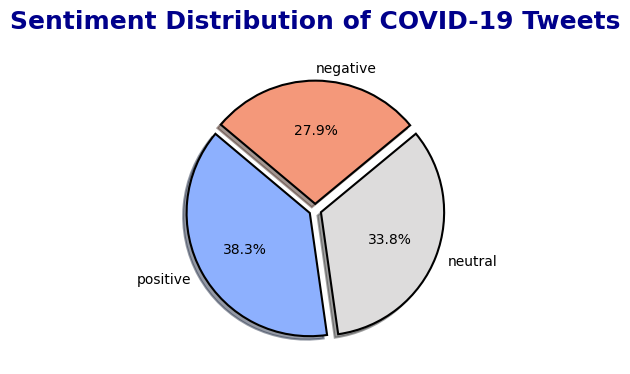

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("coolwarm", n_colors=3)  # Use a coolwarm color gradient

plt.figure(figsize=(6, 4))  # Larger figure size for better visualization
plt.pie(
    sentiment_counts, 
    labels=sentiment_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  # Enhanced edge styling
    shadow=True,  # Add shadow effect for depth
    explode=(0.05, 0.05, 0.05)  # Slightly separate the slices for emphasis
)


plt.title(
    'Sentiment Distribution of COVID-19 Tweets', 
    fontsize=18, 
    fontweight='bold', 
    color='darkblue', 
    pad=20
)


plt.show()


C:\Users\sonu\AppData\Local\Temp\ipykernel_9904\1081511200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


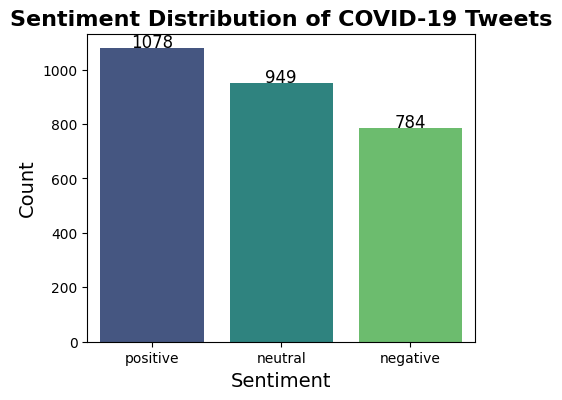

In [49]:
plt.figure(figsize=(5, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution of COVID-19 Tweets', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)

for index, value in enumerate(sentiment_counts.values):
    plt.text(index, value + 5, str(value), ha='center', fontsize=12)

plt.show()

## Sentiment Over Time
### Display a line graph showing how sentiment has changed over time. Discuss any trends or insights observed

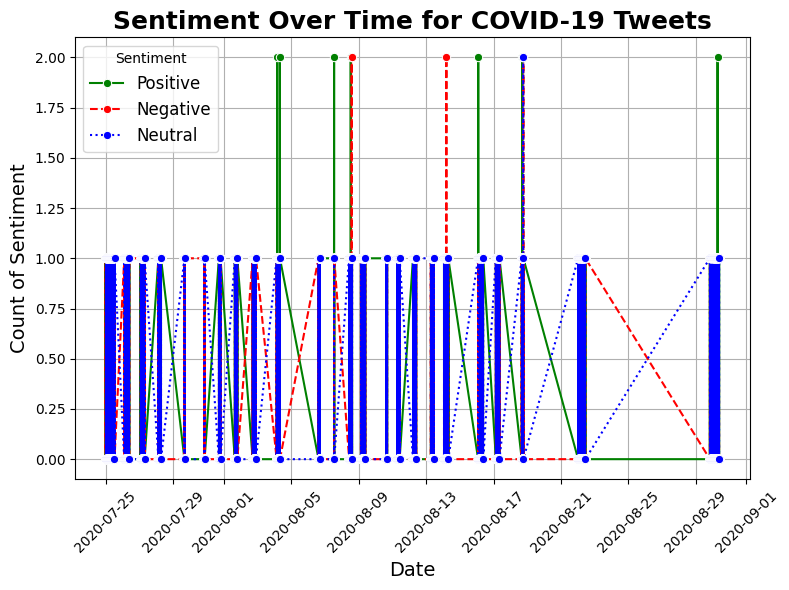

In [55]:
data['date'] = pd.to_datetime(data['date'])

# Group by date and sentiment, then count the occurrences
sentiment_over_time = data.groupby(['date', 'sentiment']).size().unstack(fill_value=0)

# Reset the index to make 'date' a column again for plotting
sentiment_over_time.reset_index(inplace=True)

# Plotting the sentiment over time
plt.figure(figsize=(8, 6))

# Plot each sentiment with specified colors and line styles
sns.lineplot(data=sentiment_over_time, x='date', y='positive', label='Positive', color='green', marker='o', linestyle='-')
sns.lineplot(data=sentiment_over_time, x='date', y='negative', label='Negative', color='red', marker='o', linestyle='--')
sns.lineplot(data=sentiment_over_time, x='date', y='neutral', label='Neutral', color='blue', marker='o', linestyle=':')

# Adding titles and labels
plt.title('Sentiment Over Time for COVID-19 Tweets', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count of Sentiment', fontsize=14)
plt.xticks(rotation=45)  
plt.grid(True)
plt.legend(title='Sentiment', fontsize=12)
plt.tight_layout() 

# Show the plot
plt.show()

### TF-IDF Vectorization
#### In this section, we convert the cleaned text data into numerical format using TF-IDF (Term Frequency-Inverse Document Frequency)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer # trend data acording there result like positive nagetive

tfidf = TfidfVectorizer(max_features=2000) # extract top words and applying on these worrds 

X = tfidf.fit_transform(data['clean_text']).toarray() # store in array 
y = data['sentiment'] # asign sentiemnt data to y for that make easy to train 

## Model Training and Evaluation
#### In this section, we train and evaluate a Logistic Regression model on the sentiment data

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.78      0.59      0.67       149
     neutral       0.64      0.71      0.68       194
    positive       0.72      0.77      0.75       220

    accuracy                           0.70       563
   macro avg       0.71      0.69      0.70       563
weighted avg       0.71      0.70      0.70       563



## LSTM Model Building and Training
### In this section, we create and train a Long Short-Term Memory (LSTM) model for sentiment analysis

In [85]:
display(Image(url="https://media.giphy.com/media/LqhVTA638nTde4SvRh/giphy.gif?cid=ecf05e47dxhorwoolyi20f5nd4z7dwshegs996i7fy3j405p&ep=v1_gifs_search&rid=giphy.gif&ct=g"))

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout 

                                  # Build LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128),  # Removed input_length
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(3, activation='softmax')  # Output layer for 3 classes: positive, negative, neutral
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert labels to numerical format
label_mapping = {'positive': 0, 'neutral': 1, 'negative': 2}
y_num = data['sentiment'].map(label_mapping).values

# Train LSTM model
model.fit(X, y_num, epochs=5, batch_size=32, validation_split=0.2) 


Epoch 1/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 217s 3s/step - accuracy: 0.3549 - loss: 1.0977 - val_accuracy: 0.4050 - val_loss: 1.0899
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 0.3791 - loss: 1.0901 - val_accuracy: 0.4050 - val_loss: 1.0887
Epoch 3/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 0.3813 - loss: 1.0921 - val_accuracy: 0.4050 - val_loss: 1.0876
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 0.3698 - loss: 1.0939 - val_accuracy: 0.4050 - val_loss: 1.0869
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.3884 - loss: 1.0883 - val_accuracy: 0.4050 - val_loss: 1.0876


## Model Evaluation
### In this section, we evaluate the performance of the trained Logistic Regression model using various metrics

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

                                                     # Evaluate Logistic Regression Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.70
Precision: 0.71
Recall: 0.70
F1 Score: 0.70


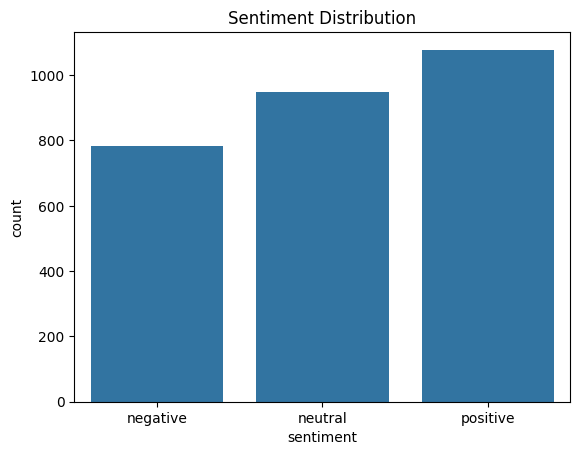

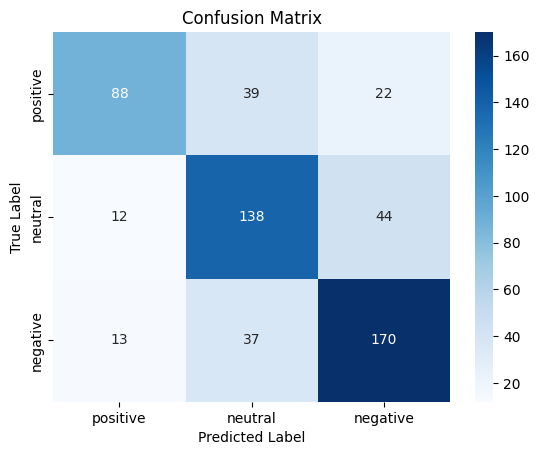

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Top 5 Positive and Negative Tweets

In [56]:
top_positive_tweets = data.sort_values(by='sentiment', ascending=False).head(5)


top_negative_tweets = data.sort_values(by='sentiment', ascending=True).head(5)

print("Top 5 Positive Tweets:")
print(top_positive_tweets[['clean_text', 'sentiment']])

print("\nTop 5 Negative Tweets:")
print(top_negative_tweets[['clean_text', 'sentiment']])

Top 5 Positive Tweets:
                                             clean_text sentiment
4119  yogi tested lac yesterday positive positivity ...  positive
3049          better starter strong finisher usain bolt  positive
4570    usfda clear simple saliva test faster detection  positive
3044  policeman test positive informs cuttack dcp pr...  positive
4571                     seeing oregon quite sure ruled  positive

Top 5 Negative Tweets:
                                             clean_text sentiment
1     affected business owner worker across industry...  negative
2458  update number new case death reported death tr...  negative
2454                           breaking news denier lie  negative
2448  three high school student infected person summ...  negative
2446                     c mon amp press item demanding  negative


C:\Users\sonu\AppData\Local\Temp\ipykernel_9904\962892772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_positive_tweets['sentiment'], y=top_positive_tweets['clean_text'], palette='Greens_d')


ValueError: Unknown format code 'f' for object of type 'str'

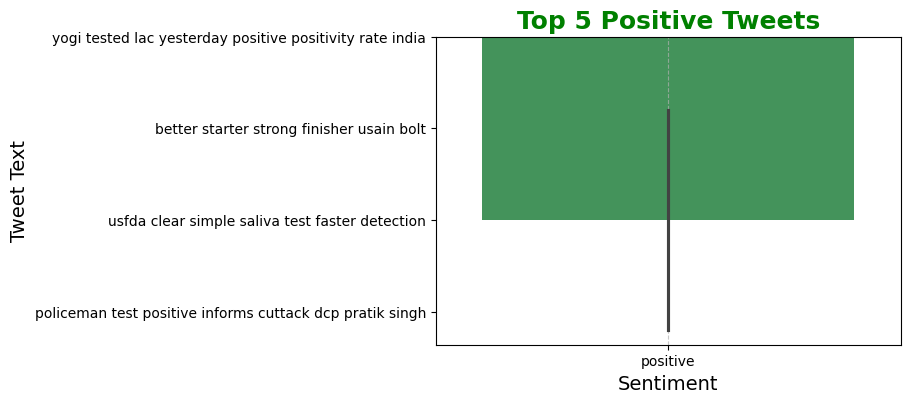

In [61]:
plt.figure(figsize=(6, 4))
sns.barplot(x=top_positive_tweets['sentiment'], y=top_positive_tweets['clean_text'], palette='Greens_d')
plt.title('Top 5 Positive Tweets', fontsize=18, fontweight='bold', color='green')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Tweet Text', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate sentiment scores on the bars
for index, value in enumerate(top_positive_tweets['sentiment']):
    plt.text(value, index, f'{value:.2f}', color='black', va='center', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\sonu\AppData\Local\Temp\ipykernel_9904\1962368700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_negative_tweets['sentiment'], y=top_negative_tweets['clean_text'], palette='Reds_d')


ValueError: Unknown format code 'f' for object of type 'str'

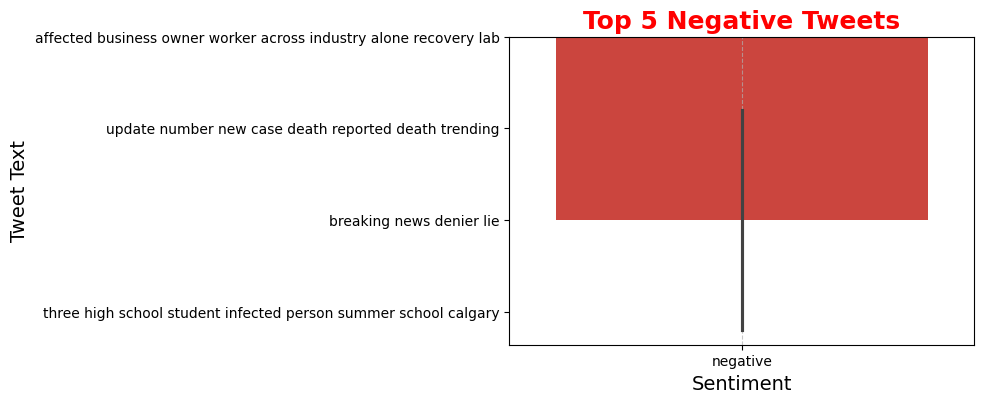

In [63]:
plt.figure(figsize=(6, 4))
sns.barplot(x=top_negative_tweets['sentiment'], y=top_negative_tweets['clean_text'], palette='Reds_d')
plt.title('Top 5 Negative Tweets', fontsize=18, fontweight='bold', color='red')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Tweet Text', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate sentiment scores on the bars
for index, value in enumerate(top_negative_tweets['sentiment']):
    plt.text(value, index, f'{value:.2f}', color='black', va='center', fontsize=12)

plt.tight_layout()
plt.show()

In [66]:
data.head(5)

,user_name,user_location,user_verified,date,hashtags,is_retweet,clean_text,sentiment,country
1,Mo Eco Devo,"Jefferson City, MO",True,2020-08-18 18:02:45,"['COVID19', 'MO']",False,affected business owner worker across industry...,negative,MO
2,KYT,"Thane, India",False,2020-07-25 05:09:23,"['Thane', 'COVID19']",False,july city update new case discharged dead acti...,negative,India
3,Dr. Wolfgang H Thome,Germany,False,2020-07-27 03:03:04,['COVID19'],False,global overnight development th th july pm eat...,negative,Germany
4,Belinda Hayes,Melbourne,False,2020-08-04 06:39:22,['COVID19'],False,theatre respond gendered impact growing violen...,negative,Melbourne
5,MOHAMMED I. JEGA,Naija,False,2020-08-01 17:09:37,['techsaturdays'],False,hospital using ai fight covid think innovation,neutral,Naija


# Extract countries form location 

In [65]:
data['country'] = data['user_location'].str.split().str[-1]

# Sentiment by User Location
### sentiment vary across different user locations

In [67]:
location_sentiment_counts = data.groupby(['country', 'sentiment']).size().unstack(fill_value=0)


location_sentiment_counts = location_sentiment_counts.loc[location_sentiment_counts.sum(axis=1).sort_values(ascending=False).index]

top_locations = location_sentiment_counts.head(10)

<Figure size 1200x800 with 0 Axes>

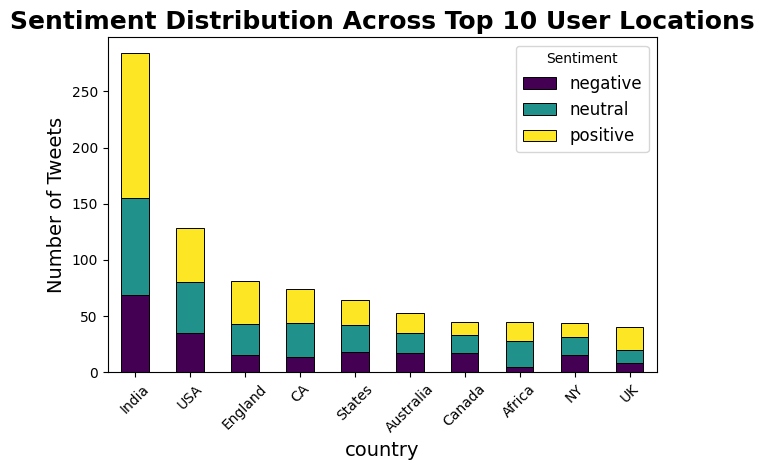

In [68]:
plt.figure(figsize=(12, 8))
top_locations.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', linewidth=0.7)

# Adding titles and labels
plt.title('Sentiment Distribution Across Top 10 User Locations', fontsize=18, fontweight='bold')
plt.xlabel('country', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Sentiment', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

In [86]:
display(Image(url="https://media.giphy.com/media/QhmboW0R7eUbm/giphy.gif?cid=790b7611o3tu77v63lcwujea9dgabaudw2x2i93tqz01tvn4&ep=v1_gifs_search&rid=giphy.gif&ct=g"))

# Conclusion
## The analysis highlighted different sentiment trends during the COVID-19 pandemic
### Prevalence of Negative Sentiment: There was a noticeable amount of negative sentiment in the tweets, likely reflecting public anxiety, fear, and uncertainty during the pandemic.
### Geographical Differences in Sentiment: The sentiment distribution varied across different locations, suggesting diverse experiences and responses to COVID-19.
### Public Discussion Topics: Commonly used words indicated key concerns and topics discussed, such as health measures, lockdowns, and vaccines.